# Multi-Layer Perceptron for MNIST Dataset

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

Step 1: Setup the input data

In [2]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 16s 1us/step


In [3]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

It is a 28x28 matrix. Each element is from 0 to 255. But in machine learning, we want the number to be from zero to 1. We have to normalize the data.

In [4]:
# Normalization
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [5]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

3


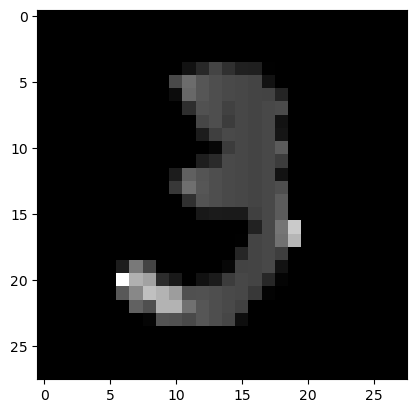

In [9]:
# Show what we have
import matplotlib.pyplot as plt
plt.imshow(X_train[10], cmap='gray')
print(y_train[10])

Step 2: Define the model

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(16, activation=tf.nn.sigmoid),
    tf.keras.layers.Dense(16, activation=tf.nn.sigmoid),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

Step 3: Compile the model

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

Step 4: Train the model

In [12]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.2389 - accuracy: 0.6955
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4489 - accuracy: 0.8889
Epoch 3/10
1875/1875 [==============================] - 2s 963us/step - loss: 0.3267 - accuracy: 0.9089
Epoch 4/10
1875/1875 [==============================] - 2s 976us/step - loss: 0.2754 - accuracy: 0.9212
Epoch 5/10
1875/1875 [==============================] - 2s 970us/step - loss: 0.2432 - accuracy: 0.9300
Epoch 6/10
1875/1875 [==============================] - 2s 997us/step - loss: 0.2217 - accuracy: 0.9362
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2054 - accuracy: 0.9404
Epoch 8/10
1875/1875 [==============================] - 2s 955us/step - loss: 0.1933 - accuracy: 0.9439
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1828 - accuracy: 0.9470
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - l

Step 5: Print out the model summary

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


Step 6: Evaluate the model

In [14]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print("Validation accuracy:", val_acc)

313/313 [==============================] - 0s 849us/step - loss: 0.1957 - accuracy: 0.9423
Validation accuracy: 0.942300021648407


Step 7: Save the model for future use

In [15]:
model.save("mlp_16_16.model")

INFO:tensorflow:Assets written to: mlp_16_16.model\assets
